# Predictive Health Risk Analysis using Lifestyle Data

## Objective
This project aims to predict health risk levels (None, Mild, Moderate) based on lifestyle factors such as coffee intake, stress, sleep, BMI, and heart rate.

## Data Mining Process
1. Data Understanding
2. Data Cleaning & Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Building & Evaluation
6. Model Explainability
7. Insights & Recommendations


## 1. Data Understanding


In [ ]:
%pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('data/synthetic_coffee_health_10000.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Dataset Shape: (10000, 16)

First few rows:


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
# Basic dataset information
print("Dataset Info:")
print("="*50)
df.info()

print("\nDataset Description:")
print("="*50)
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking  

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [ ]:
# Check for missing values
print("Missing Values:")
print("="*30)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Check data types
print("\nData Types:")
print("="*30)
print(df.dtypes)

# Check unique values in categorical columns
print("\nCategorical Columns Unique Values:")
print("="*40)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() <= 10:
        print(f"  Values: {df[col].unique()}")


Missing Values:
Health_Issues    5941
dtype: int64

Data Types:
ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

Categorical Columns Unique Values:
Gender: 3 unique values
  Values: ['Male' 'Female' 'Other']
Country: 20 unique values
Sleep_Quality: 4 unique values
  Values: ['Good' 'Fair' 'Excellent' 'Poor']
Stress_Level: 3 unique values
  Values: ['Low' 'Medium' 'High']
Health_Issues: 3 unique values
  Values: [nan 'Mild' 'Moderate' 'Severe']
Occupation: 5 unique value

## 2. Data Cleaning & Preprocessing


In [ ]:
# Create a copy for preprocessing
df_clean = df.copy()

# Check for duplicates
print(f"Duplicate rows: {df_clean.duplicated().sum()}")

# Remove duplicates if any
df_clean = df_clean.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df_clean.shape}")

# Check for outliers in numerical columns
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
print("\nOutlier Analysis:")
print("="*30)

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df_clean)*100:.2f}%)")


Duplicate rows: 0
Dataset shape after removing duplicates: (10000, 16)

Outlier Analysis:
ID: 0 outliers (0.00%)
Age: 25 outliers (0.25%)
Coffee_Intake: 39 outliers (0.39%)
Caffeine_mg: 39 outliers (0.39%)
Sleep_Hours: 26 outliers (0.26%)
BMI: 40 outliers (0.40%)
Heart_Rate: 50 outliers (0.50%)
Physical_Activity_Hours: 0 outliers (0.00%)
Smoking: 2004 outliers (20.04%)
Alcohol_Consumption: 0 outliers (0.00%)


In [ ]:
# Handle categorical variables - encode them
le_dict = {}

for col in categorical_cols:
    if col != 'Health_Issues':  # Don't encode target variable yet
        le = LabelEncoder()
        df_clean[col + '_encoded'] = le.fit_transform(df_clean[col])
        le_dict[col] = le
        print(f"{col} encoding:")
        for i, val in enumerate(le.classes_):
            print(f"  {val}: {i}")
        print()

# Encode target variable
le_target = LabelEncoder()
df_clean['Health_Issues_encoded'] = le_target.fit_transform(df_clean['Health_Issues'])
print("Health_Issues encoding:")
for i, val in enumerate(le_target.classes_):
    print(f"  {val}: {i}")


Gender encoding:
  Female: 0
  Male: 1
  Other: 2

Country encoding:
  Australia: 0
  Belgium: 1
  Brazil: 2
  Canada: 3
  China: 4
  Finland: 5
  France: 6
  Germany: 7
  India: 8
  Italy: 9
  Japan: 10
  Mexico: 11
  Netherlands: 12
  Norway: 13
  South Korea: 14
  Spain: 15
  Sweden: 16
  Switzerland: 17
  UK: 18
  USA: 19

Sleep_Quality encoding:
  Excellent: 0
  Fair: 1
  Good: 2
  Poor: 3

Stress_Level encoding:
  High: 0
  Low: 1
  Medium: 2

Occupation encoding:
  Healthcare: 0
  Office: 1
  Other: 2
  Service: 3
  Student: 4

Health_Issues encoding:
  Mild: 0
  Moderate: 1
  Severe: 2
  nan: 3


## 3. Exploratory Data Analysis (EDA)


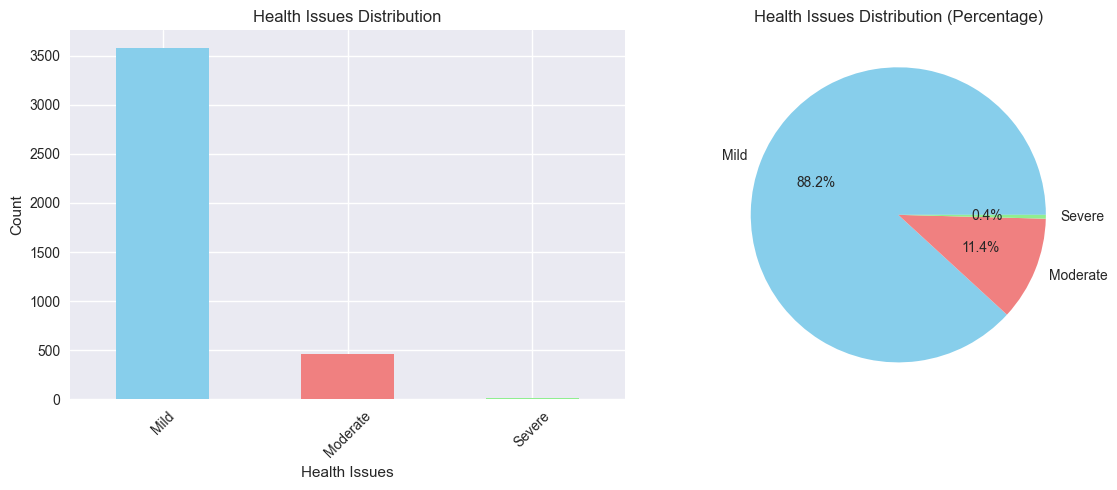

Health Issues Distribution:
Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

Health Issues Percentage:
Health_Issues
Mild        88.174427
Moderate    11.406750
Severe       0.418822
Name: proportion, dtype: float64


In [ ]:
# Target variable distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_clean['Health_Issues'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Health Issues Distribution')
plt.xlabel('Health Issues')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df_clean['Health_Issues'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Health Issues Distribution (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.show()

print("Health Issues Distribution:")
print(df_clean['Health_Issues'].value_counts())
print("\nHealth Issues Percentage:")
print(df_clean['Health_Issues'].value_counts(normalize=True) * 100)


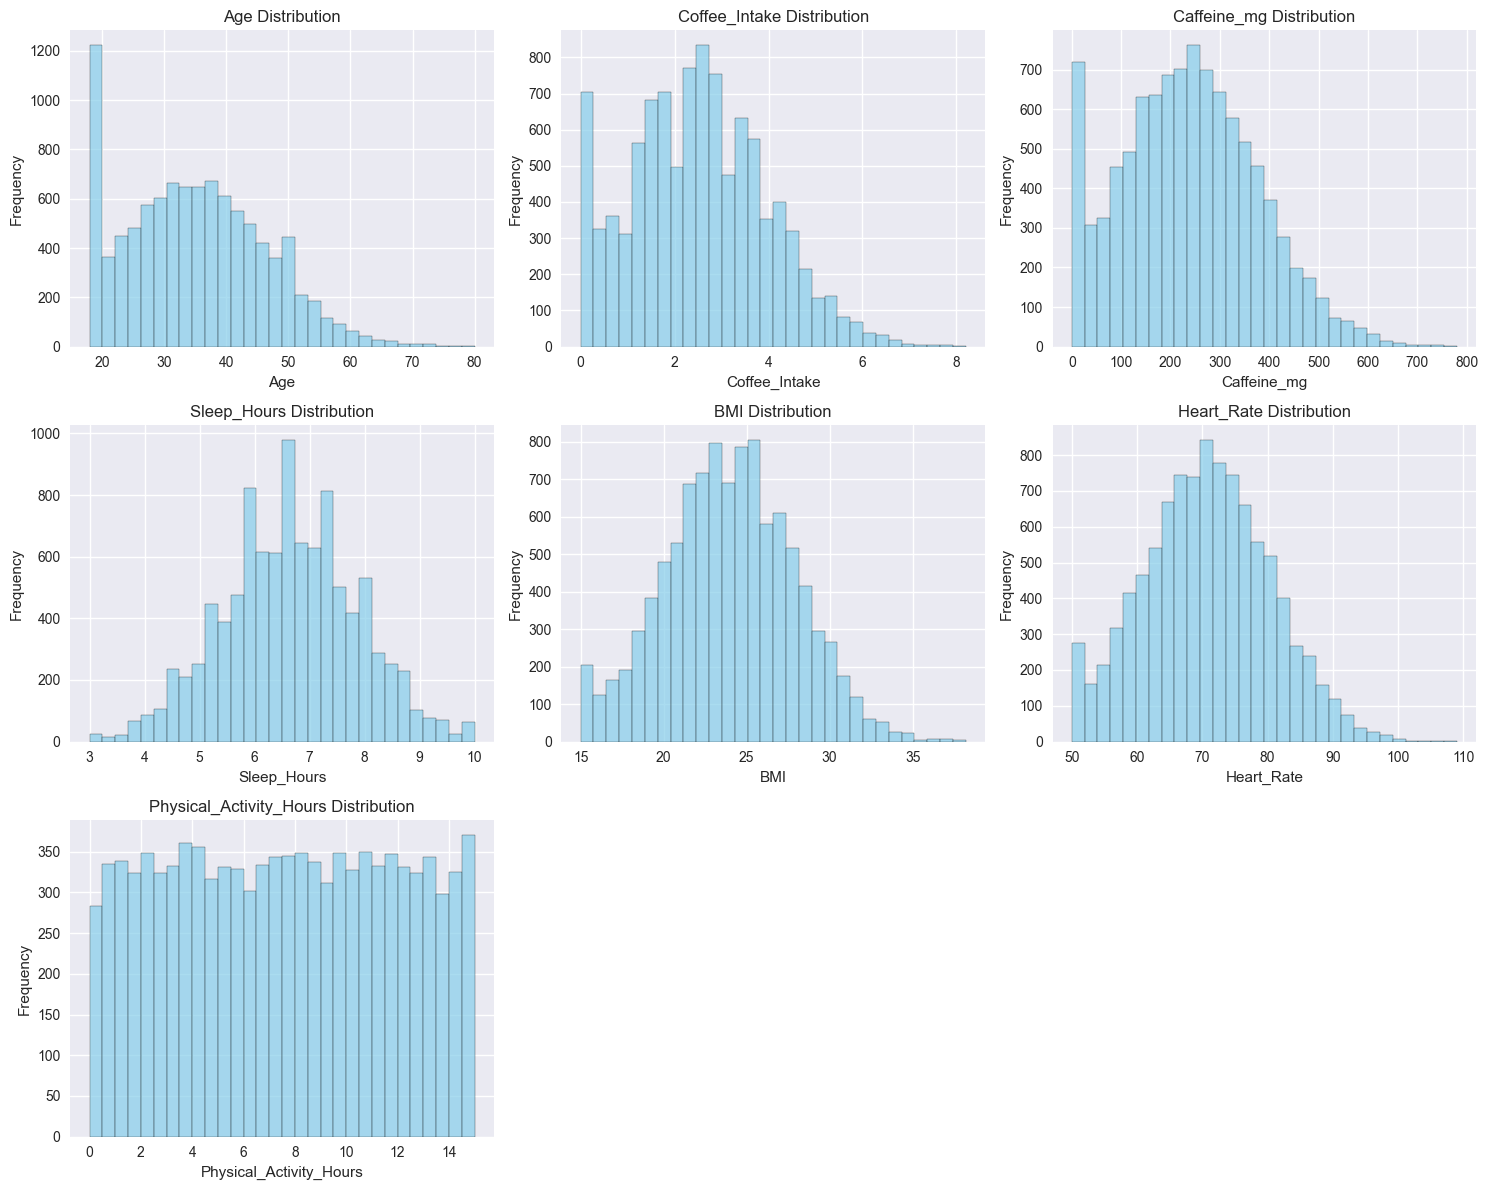

In [ ]:
# Numerical features distribution
numerical_features = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        axes[i].hist(df_clean[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'{feature} Distribution')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


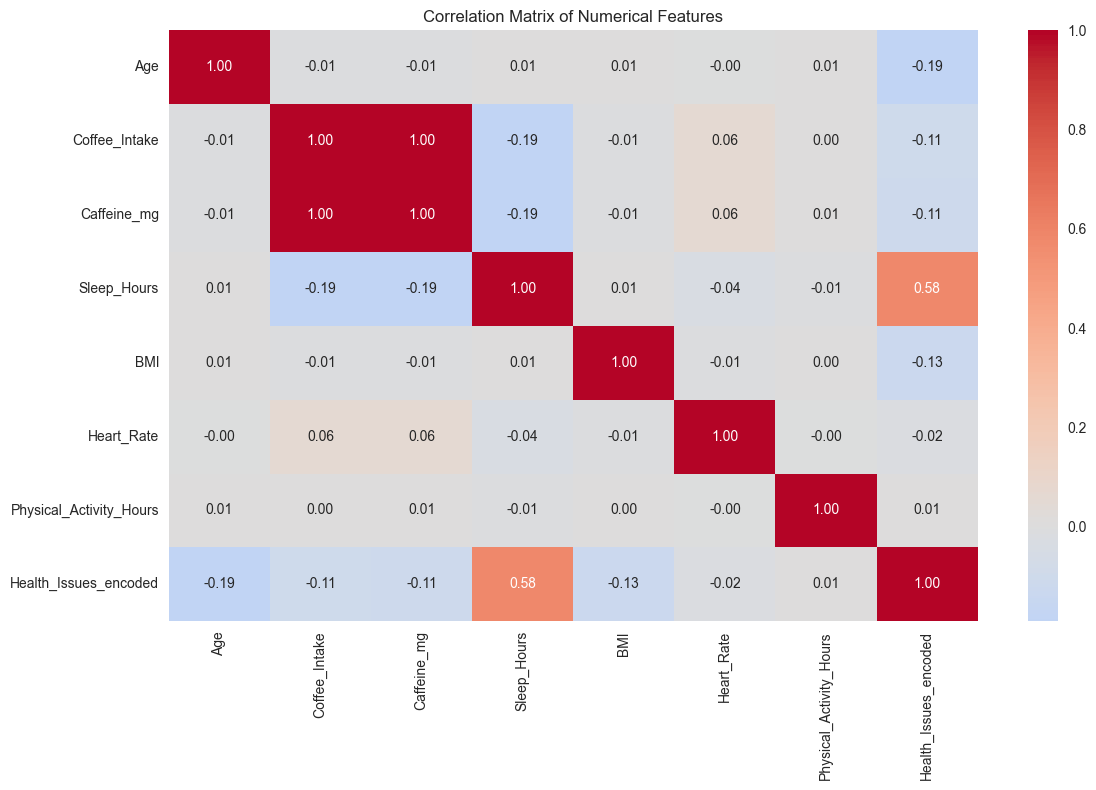

In [ ]:
# Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df_clean[numerical_features + ['Health_Issues_encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


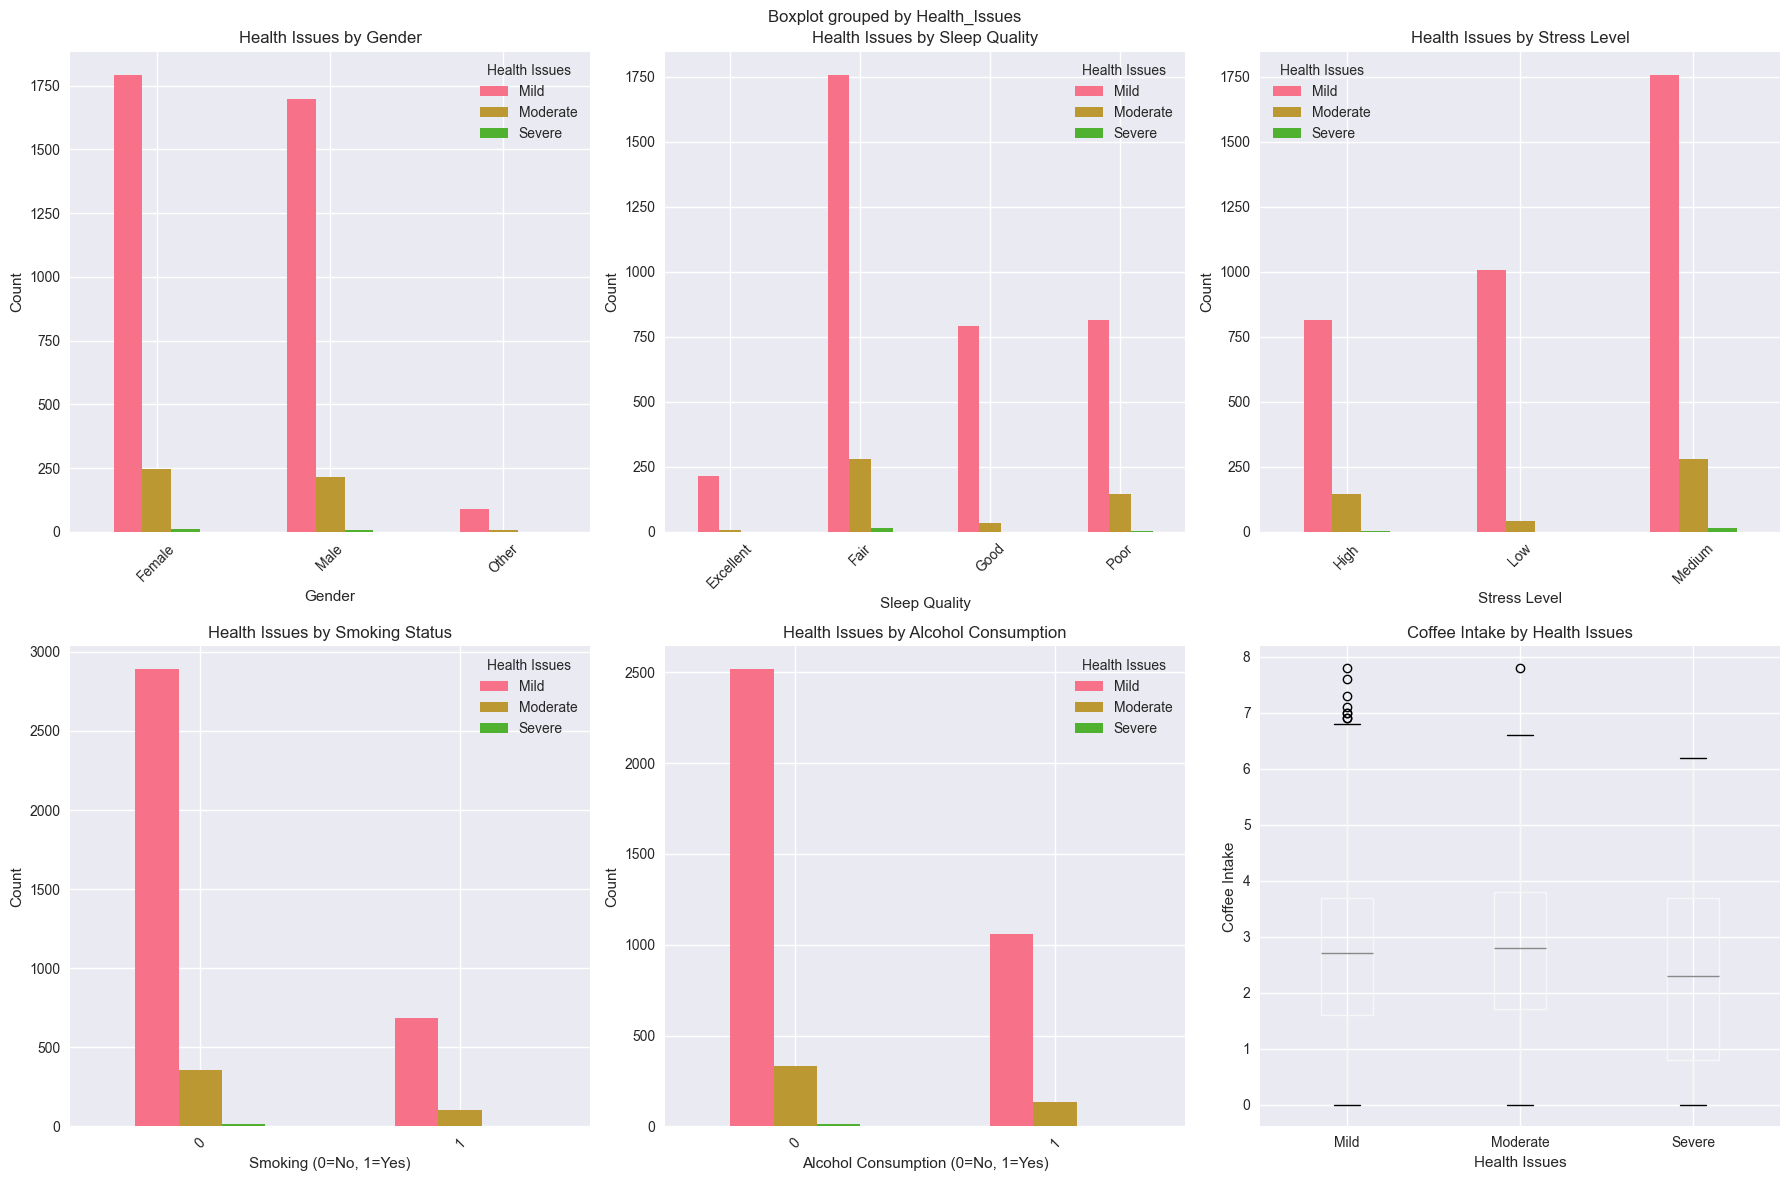

In [ ]:
# Health issues by different factors
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Gender vs Health Issues
df_clean.groupby(['Gender', 'Health_Issues']).size().unstack().plot(kind='bar', ax=axes[0])
axes[0].set_title('Health Issues by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Health Issues')
axes[0].tick_params(axis='x', rotation=45)

# Sleep Quality vs Health Issues
df_clean.groupby(['Sleep_Quality', 'Health_Issues']).size().unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('Health Issues by Sleep Quality')
axes[1].set_xlabel('Sleep Quality')
axes[1].set_ylabel('Count')
axes[1].legend(title='Health Issues')
axes[1].tick_params(axis='x', rotation=45)

# Stress Level vs Health Issues
df_clean.groupby(['Stress_Level', 'Health_Issues']).size().unstack().plot(kind='bar', ax=axes[2])
axes[2].set_title('Health Issues by Stress Level')
axes[2].set_xlabel('Stress Level')
axes[2].set_ylabel('Count')
axes[2].legend(title='Health Issues')
axes[2].tick_params(axis='x', rotation=45)

# Smoking vs Health Issues
df_clean.groupby(['Smoking', 'Health_Issues']).size().unstack().plot(kind='bar', ax=axes[3])
axes[3].set_title('Health Issues by Smoking Status')
axes[3].set_xlabel('Smoking (0=No, 1=Yes)')
axes[3].set_ylabel('Count')
axes[3].legend(title='Health Issues')
axes[3].tick_params(axis='x', rotation=45)

# Alcohol Consumption vs Health Issues
df_clean.groupby(['Alcohol_Consumption', 'Health_Issues']).size().unstack().plot(kind='bar', ax=axes[4])
axes[4].set_title('Health Issues by Alcohol Consumption')
axes[4].set_xlabel('Alcohol Consumption (0=No, 1=Yes)')
axes[4].set_ylabel('Count')
axes[4].legend(title='Health Issues')
axes[4].tick_params(axis='x', rotation=45)

# Coffee Intake vs Health Issues (box plot)
df_clean.boxplot(column='Coffee_Intake', by='Health_Issues', ax=axes[5])
axes[5].set_title('Coffee Intake by Health Issues')
axes[5].set_xlabel('Health Issues')
axes[5].set_ylabel('Coffee Intake')

plt.tight_layout()
plt.show()


## 4. Feature Engineering


In [ ]:
# Create new features
df_features = df_clean.copy()

# BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_features['BMI_Category'] = df_features['BMI'].apply(categorize_bmi)

# Sleep efficiency (assuming 8 hours is optimal)
df_features['Sleep_Efficiency'] = df_features['Sleep_Hours'] / 8.0

# Caffeine per coffee cup (assuming average 95mg per cup)
df_features['Caffeine_per_Cup'] = df_features['Caffeine_mg'] / df_features['Coffee_Intake'].replace(0, 1)

# Risk factors combination
df_features['Risk_Score'] = (
    df_features['Stress_Level_encoded'] * 0.3 +
    (df_features['BMI'] - 22) * 0.1 +  # BMI deviation from ideal
    (df_features['Heart_Rate'] - 70) * 0.05 +  # Heart rate deviation
    df_features['Smoking'] * 0.3 +
    df_features['Alcohol_Consumption'] * 0.1
)

# Physical activity level
def activity_level(hours):
    if hours < 2:
        return 'Low'
    elif hours < 5:
        return 'Moderate'
    else:
        return 'High'

df_features['Activity_Level'] = df_features['Physical_Activity_Hours'].apply(activity_level)

print("New features created:")
print("- BMI_Category")
print("- Sleep_Efficiency")
print("- Caffeine_per_Cup")
print("- Risk_Score")
print("- Activity_Level")

# Encode new categorical features
le_bmi = LabelEncoder()
df_features['BMI_Category_encoded'] = le_bmi.fit_transform(df_features['BMI_Category'])

le_activity = LabelEncoder()
df_features['Activity_Level_encoded'] = le_activity.fit_transform(df_features['Activity_Level'])

print("\nBMI Category distribution:")
print(df_features['BMI_Category'].value_counts())
print("\nActivity Level distribution:")
print(df_features['Activity_Level'].value_counts())


New features created:
- BMI_Category
- Sleep_Efficiency
- Caffeine_per_Cup
- Risk_Score
- Activity_Level

BMI Category distribution:
BMI_Category
Normal         5117
Overweight     3421
Underweight     819
Obese           643
Name: count, dtype: int64

Activity Level distribution:
Activity_Level
High        6679
Moderate    2040
Low         1281
Name: count, dtype: int64
